Predicting Survival in the Titanic Data Set <br> <br>
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not. <br> <br>
Loading Data and modules <br>
import numpy as np <br>
import pandas as pd <br>
import seaborn as sb <br>
import matplotlib.pyplot as plt <br>
import sklearn <br>
from pandas import Series, DataFrame <br>
from pylab import rcParams <br>
from sklearn import preprocessing <br>
from sklearn.linear_model import LogisticRegression <br>
from sklearn.cross_validation import train_test_split <br>
from sklearn import metrics <br>
from sklearn.metrics import classification_report <br> <br>

Url= https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv <br> <br>

titanic = pd.read_csv(url) <br>
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'] <br> <br>
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
gender = {'male':1,'female':0}
titanic['Sex'] = titanic['Sex'].map(gender)
titanic.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [4]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.corr()
#1. Survival rate is highly correlated to gender, moderately correlated to fare and passenger class

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [7]:
#Age has blanks - imputing with mean age
age_mean = round(np.mean(titanic[titanic['Age'].notnull()]['Age']),0)
titanic['Age'].fillna(age_mean,inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


<AxesSubplot:xlabel='Fare', ylabel='Count'>

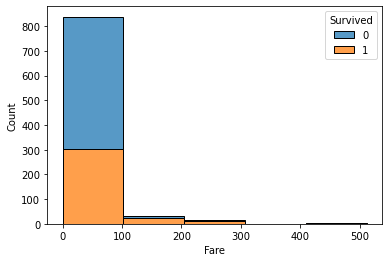

In [8]:
sns.histplot(data=titanic,x='Fare',hue='Survived',multiple='stack',bins=5)

<AxesSubplot:>

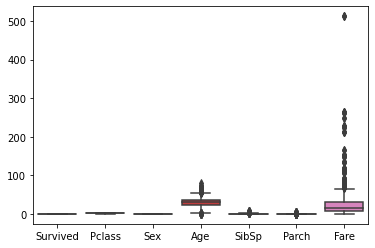

In [9]:
sns.boxplot(data=titanic)

In [10]:
titanic['Age'] = np.ceil(titanic['Age'])
titanic['Age'].unique()

array([22., 38., 26., 35., 30., 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 33.,
       23., 24., 46., 59., 71., 37., 47., 12.,  9., 51., 56., 41., 44.,
       61., 50., 36., 62., 52., 63., 43., 60., 10., 64., 13., 48., 53.,
       57., 80., 70.,  6., 74.])

In [11]:
titanic[(titanic['Fare']==0)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
179,0,3,1,36.0,0,0,0.0
263,0,1,1,40.0,0,0,0.0
271,1,3,1,25.0,0,0,0.0
277,0,2,1,30.0,0,0,0.0
302,0,3,1,19.0,0,0,0.0
413,0,2,1,30.0,0,0,0.0
466,0,2,1,30.0,0,0,0.0
481,0,2,1,30.0,0,0,0.0
597,0,3,1,49.0,0,0,0.0
633,0,1,1,30.0,0,0,0.0


In [12]:
fare = titanic.groupby(['Pclass'])['Fare'].mean().reset_index()
f_map = fare.set_index('Pclass').T.to_dict('records')[0]
for i in range(1,4):
    for j in titanic.index:
        if titanic.Fare[j] == 0 and titanic.Pclass[j] == i:
            #print(f_map[i])
            titanic.at[j,'Fare'] = f_map[i]

In [13]:
titanic = titanic[~((titanic['Fare']<=20.66) & (titanic['Pclass']==1))]
titanic = titanic[~(titanic['Fare']>500)]

In [14]:
titanic[(titanic['Fare']<=13.67) & (titanic['Pclass']==2)]['Fare'].value_counts()

13.000    42
10.500    24
11.500     4
13.500     4
12.350     3
12.650     1
12.275     1
12.875     1
12.000     1
12.525     1
Name: Fare, dtype: int64

In [15]:
X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']
print(y.shape)
smote = SMOTE()
X, y = smote.fit_resample(X,y)
print(y.shape)

(887,)
(1096,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

0.8467153284671532
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       130
           1       0.89      0.81      0.85       144

    accuracy                           0.85       274
   macro avg       0.85      0.85      0.85       274
weighted avg       0.85      0.85      0.85       274

